#Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [8]:
data=pd.read_csv('reviews.csv')
data

id          profileName  \
0     R30RYIBNSAA21M              Sankalp   
1     R2W0AVM9ZV0LDM         Sonia Mattas   
2     R2PUN6AZGN9H7K      Vanshita Jindal   
3     R2JRT4APHWZZG5          Manjunath M   
4     R1CXD23230IN1T               Hemant   
...              ...                  ...   
2495  R2MV3PIPWBGM3I             BHADRESH   
2496   RE1LZZLNIJXRH  Kevin Joseph roshan   
2497   RLTJM2P9AERSJ           Jashwanth    
2498  R10UPMNFFDEX6X               Asmath   
2499  R3IU1IV04MSCGE       Deep toshniwal   

                                                   text  \
0     Nothing special about it. Expected more from o...   
1     Product is waste. Battery backup is worst. Not...   
2     Comfortable to wear and looks good 👍🏻 connecti...   
3     Band looks Premium and the sense is good,I am ...   
4     This activity tracker does nothing. The heart ...   
...                                                 ...   
2495            Battery problem & spo2 reading Not sure   
2496                                        Nyc product   
2497                                             Good 👍   
2498                                                 Na   
2499                                          Functions   

                                      date  \
0     Reviewed in India on 15 January 2021   
1     Reviewed in India on 15 January 2021   
2     Reviewed in India on 15 January 2021   
3     Reviewed in India on 16 January 2021   
4     Reviewed in India on 16 January 2021   
...                                    ...   
2495      Reviewed in India on 6 June 2021   
2496    Reviewed in India on 13 March 2021   
2497  Reviewed in India on 3 February 2022   
2498    Reviewed in India on 29 April 2021   
2499  Reviewed in India on 18 January 2022   

                                                  title  rating  \
0     In a nutshell, I won't recommend it but you de...       1   
1                                    Issue with battery       1   
2                                            Convenient       5   
3         First band from one plus is good but not Best       4   
4      Pointless heart rate monitoring. Utter nonsense.       1   
...                                                 ...     ...   
2495                                            Not buy       1   
2496                            All in one fitness band       5   
2497                                              Good👍       4   
2498                                                 Na       1   
2499                           It's good and reasonable       3   

                                                 images  helpful  Style name  
0                                                   NaN      906  Smart Band  
1                                                   NaN      590  Smart Band  
2     https://images-na.ssl-images-amazon.com/images...      566  Smart Band  
3                                                   NaN      155  Smart Band  
4                                                   NaN       83  Smart Band  
...                                                 ...      ...         ...  
2495                                                NaN        0  Smart Band  
2496                                                NaN        0  Smart Band  
2497  https://m.media-amazon.com/images/I/519oPk8iFy...        0  Smart Band  
2498                                                NaN        0  Smart Band  
2499                                                NaN        0  Smart Band  

[2500 rows x 9 columns]

In [20]:
reviews = data[['rating','text']]
reviews

rating                                               text
0          1  Nothing special about it. Expected more from o...
1          1  Product is waste. Battery backup is worst. Not...
2          5  Comfortable to wear and looks good 👍🏻 connecti...
3          4  Band looks Premium and the sense is good,I am ...
4          1  This activity tracker does nothing. The heart ...
...      ...                                                ...
2495       1            Battery problem & spo2 reading Not sure
2496       5                                        Nyc product
2497       4                                             Good 👍
2498       1                                                 Na
2499       3                                          Functions

[2500 rows x 2 columns]

In [21]:
reviews.shape

(2500, 2)

In [22]:
reviews.rename(columns = {'rating':'stars','text':'comment'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    2500 non-null   int64 
 1   comment  2428 non-null   object
dtypes: int64(1), object(1)
memory usage: 39.2+ KB


In [24]:
reviews.isna().sum()

stars       0
comment    72
dtype: int64

In [25]:
reviews.dropna()

stars                                            comment
0         1  Nothing special about it. Expected more from o...
1         1  Product is waste. Battery backup is worst. Not...
2         5  Comfortable to wear and looks good 👍🏻 connecti...
3         4  Band looks Premium and the sense is good,I am ...
4         1  This activity tracker does nothing. The heart ...
...     ...                                                ...
2495      1            Battery problem & spo2 reading Not sure
2496      5                                        Nyc product
2497      4                                             Good 👍
2498      1                                                 Na
2499      3                                          Functions

[2428 rows x 2 columns]

#Text Preprocessing

In [32]:
reviews['comment'] = reviews['comment'].astype('str') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
reviews=[comment.strip() for comment in reviews.comment] 
reviews=[comment for comment in reviews if comment] 
reviews[0:10]

["Nothing special about it. Expected more from oneplus brand. Both spO2 and heartbeat sensors are inaccurate.Battery isnt 14days if you use it often. Still looking into it.A lot of pairing issues, not just with me but same issue with other users too.Couldn't expect a lot from a ₹2500 fitness bandGave the watch to my little brother for playing around. Not good enough to replace my gshock.Edited:Battery last 7 days in normal use.",
 'Product is waste. Battery backup is worst. Not worthy',
 'Comfortable to wear and looks good 👍🏻 connection to phone is really nice and displays notifications as soon as they comes on phone ✅',
 'Band looks Premium and the sense is good,I am using it from last 3 to 4 days,Pros:1. wrist up to wake is fast2. Display is super3. Both Spo2 and hear rate sensing is also good4. Its water proof5. Smooth Rubber and skin friendly6. 24/7 heart rate sensing7. Battery is now 54% for 4days.Cons :1. App is not good, should get more options, App should get updated as in Mi b

Joining the String

In [34]:
reviews_text=' '.join(reviews)
reviews_text

'Nothing special about it. Expected more from oneplus brand. Both spO2 and heartbeat sensors are inaccurate.Battery isnt 14days if you use it often. Still looking into it.A lot of pairing issues, not just with me but same issue with other users too.Couldn\'t expect a lot from a ₹2500 fitness bandGave the watch to my little brother for playing around. Not good enough to replace my gshock.Edited:Battery last 7 days in normal use. Product is waste. Battery backup is worst. Not worthy Comfortable to wear and looks good 👍🏻 connection to phone is really nice and displays notifications as soon as they comes on phone ✅ Band looks Premium and the sense is good,I am using it from last 3 to 4 days,Pros:1. wrist up to wake is fast2. Display is super3. Both Spo2 and hear rate sensing is also good4. Its water proof5. Smooth Rubber and skin friendly6. 24/7 heart rate sensing7. Battery is now 54% for 4days.Cons :1. App is not good, should get more options, App should get updated as in Mi band.2. Batte

Remove the Punctuation

In [35]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Nothing special about it Expected more from oneplus brand Both spO2 and heartbeat sensors are inaccurateBattery isnt 14days if you use it often Still looking into itA lot of pairing issues not just with me but same issue with other users tooCouldnt expect a lot from a ₹2500 fitness bandGave the watch to my little brother for playing around Not good enough to replace my gshockEditedBattery last 7 days in normal use Product is waste Battery backup is worst Not worthy Comfortable to wear and looks good 👍🏻 connection to phone is really nice and displays notifications as soon as they comes on phone ✅ Band looks Premium and the sense is goodI am using it from last 3 to 4 daysPros1 wrist up to wake is fast2 Display is super3 Both Spo2 and hear rate sensing is also good4 Its water proof5 Smooth Rubber and skin friendly6 247 heart rate sensing7 Battery is now 54 for 4daysCons 1 App is not good should get more options App should get updated as in Mi band2 Battery backup will be 8 to 9 days with

#Text Tokenization

In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Nothing', 'special', 'about', 'it', 'Expected', 'more', 'from', 'oneplus', 'brand', 'Both', 'spO2', 'and', 'heartbeat', 'sensors', 'are', 'inaccurateBattery', 'isnt', '14days', 'if', 'you', 'use', 'it', 'often', 'Still', 'looking', 'into', 'itA', 'lot', 'of', 'pairing', 'issues', 'not', 'just', 'with', 'me', 'but', 'same', 'issue', 'with', 'other', 'users', 'tooCouldnt', 'expect', 'a', 'lot', 'from', 'a', '₹2500', 'fitness', 'bandGave']


51634

#Remove Stop-words 

In [37]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Nothing', 'special', 'Expected', 'oneplus', 'brand', 'Both', 'spO2', 'heartbeat', 'sensors', 'inaccurateBattery', 'isnt', '14days', 'use', 'often', 'Still', 'looking', 'itA', 'lot', 'pairing', 'issues', 'issue', 'users', 'tooCouldnt', 'expect', 'lot', '₹2500', 'fitness', 'bandGave', 'watch', 'little', 'brother', 'playing', 'around', 'Not', 'good', 'enough', 'replace', 'gshockEditedBattery', 'last', '7', 'days', 'normal', 'use', 'Product', 'waste', 'Battery', 'backup', 'worst', 'Not', 'worthy', 'Comfortable', 'wear', 'looks', 'good', '👍🏻', 'connection', 'phone', 'really', 'nice', 'displays', 'notifications', 'soon', 'comes', 'phone', '✅', 'Band', 'looks', 'Premium', 'sense', 'goodI', 'using', 'last', '3', '4', 'daysPros1', 'wrist', 'wake', 'fast2', 'Display', 'super3', 'Both', 'Spo2', 'hear', 'rate', 'sensing', 'also', 'good4', 'Its', 'water', 'proof5', 'Smooth', 'Rubber', 'skin', 'friendly6', '247', 'heart', 'rate', 'sensing7', 'Battery', '54', '4daysCons', '1', 'App', 'good', 'get',

#Text Normalization

In [38]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['nothing', 'special', 'expected', 'oneplus', 'brand', 'both', 'spo2', 'heartbeat', 'sensors', 'inaccuratebattery', 'isnt', '14days', 'use', 'often', 'still', 'looking', 'ita', 'lot', 'pairing', 'issues', 'issue', 'users', 'toocouldnt', 'expect', 'lot', '₹2500', 'fitness', 'bandgave', 'watch', 'little', 'brother', 'playing', 'around', 'not', 'good', 'enough', 'replace', 'gshockeditedbattery', 'last', '7', 'days', 'normal', 'use', 'product', 'waste', 'battery', 'backup', 'worst', 'not', 'worthy', 'comfortable', 'wear', 'looks', 'good', '👍🏻', 'connection', 'phone', 'really', 'nice', 'displays', 'notifications', 'soon', 'comes', 'phone', '✅', 'band', 'looks', 'premium', 'sense', 'goodi', 'using', 'last', '3', '4', 'dayspros1', 'wrist', 'wake', 'fast2', 'display', 'super3', 'both', 'spo2', 'hear', 'rate', 'sensing', 'also', 'good4', 'its', 'water', 'proof5', 'smooth', 'rubber', 'skin', 'friendly6', '247', 'heart', 'rate', 'sensing7', 'battery', '54', '4dayscons', '1', 'app', 'good', 'get',

#Stemming

In [39]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['noth', 'special', 'expect', 'oneplu', 'brand', 'both', 'spo2', 'heartbeat', 'sensor', 'inaccuratebatteri', 'isnt', '14day', 'use', 'often', 'still', 'look', 'ita', 'lot', 'pair', 'issu', 'issu', 'user', 'toocouldnt', 'expect', 'lot', '₹2500', 'fit', 'bandgav', 'watch', 'littl', 'brother', 'play', 'around', 'not', 'good', 'enough', 'replac', 'gshockeditedbatteri', 'last', '7', 'day', 'normal', 'use', 'product', 'wast', 'batteri', 'backup', 'worst', 'not', 'worthi', 'comfort', 'wear', 'look', 'good', '👍🏻', 'connect', 'phone', 'realli', 'nice', 'display', 'notif', 'soon', 'come', 'phone', '✅', 'band', 'look', 'premium', 'sens', 'goodi', 'use', 'last', '3', '4', 'dayspros1', 'wrist', 'wake', 'fast2', 'display', 'super3', 'both', 'spo2', 'hear', 'rate', 'sens', 'also', 'good4', 'it', 'water', 'proof5', 'smooth', 'rubber', 'skin', 'friendly6', '247', 'heart', 'rate', 'sensing7', 'batteri', '54', '4dayscon', '1', 'app', 'good', 'get', 'option', 'app', 'get', 'updat', 'mi', 'band2', 'batteri

#Lemmatization

In [40]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['nothing', 'special', 'expect', 'oneplus', 'brand', 'both', 'spo2', 'heartbeat', 'sensor', 'inaccuratebattery', 'be', 'not', '14days', 'use', 'often', 'still', 'look', 'ita', 'lot', 'pairing', 'issue', 'issue', 'user', 'toocouldnt', 'expect', 'lot', '₹', '2500', 'fitness', 'bandgave', 'watch', 'little', 'brother', 'play', 'around', 'not', 'good', 'enough', 'replace', 'gshockeditedbattery', 'last', '7', 'day', 'normal', 'use', 'product', 'waste', 'battery', 'backup', 'bad', 'not', 'worthy', 'comfortable', 'wear', 'look', 'good', '👍', '🏻', 'connection', 'phone', 'really', 'nice', 'display', 'notification', 'soon', 'come', 'phone', '✅', 'band', 'look', 'premium', 'sense', 'goodi', 'use', 'last', '3', '4', 'dayspros1', 'wrist', 'wake', 'fast2', 'display', 'super3', 'both', 'spo2', 'hear', 'rate', 'sensing', 'also', 'good4', 'its', 'water', 'proof5', 'smooth', 'rubber', 'skin', 'friendly6', '247', 'heart', 'rate', 'sensing7', 'battery', '54', '4dayscons', '1', 'app', 'good', 'get', 'option

In [50]:
clean_reviews=' '.join(lemmas)
clean_reviews

"nothing special expect oneplus brand both spo2 heartbeat sensor inaccuratebattery be not 14days use often still look ita lot pairing issue issue user toocouldnt expect lot ₹ 2500 fitness bandgave watch little brother play around not good enough replace gshockeditedbattery last 7 day normal use product waste battery backup bad not worthy comfortable wear look good 👍 🏻 connection phone really nice display notification soon come phone ✅ band look premium sense goodi use last 3 4 dayspros1 wrist wake fast2 display super3 both spo2 hear rate sensing also good4 its water proof5 smooth rubber skin friendly6 247 heart rate sensing7 battery 54 4dayscons 1 app good get option app get update mi band2 battery backup 8 9 day 247 heartsense disable heart sense 247 expect 14 daysother issueswill update daysthank youmanjunath m this activity tracker nothing heart rate monitor do not monitor heart beat continuously you swipe heart beat option click start record heart beat even show one reading after r

#Feature Extraction

1. Bag Of Words Count Vectorizer

In [41]:

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)
print(cv.get_feature_names()[150:300])
print(reviewscv.toarray()[150:300])
print(reviewscv.toarray().shape)

{'nothing': 2695, 'special': 3654, 'expect': 1512, 'oneplus': 2771, 'brand': 781, 'both': 773, 'spo2': 3665, 'heartbeat': 1929, 'sensor': 3492, 'inaccuratebattery': 2054, 'be': 686, 'not': 2691, '14days': 42, 'use': 4160, 'often': 2744, 'still': 3720, 'look': 2382, 'ita': 2182, 'lot': 2396, 'pairing': 2877, 'issue': 2166, 'user': 4178, 'toocouldnt': 3978, '2500': 114, 'fitness': 1645, 'bandgave': 633, 'watch': 4273, 'little': 2361, 'brother': 805, 'play': 2988, 'around': 523, 'good': 1791, 'enough': 1442, 'replace': 3316, 'gshockeditedbattery': 1868, 'last': 2291, 'day': 1167, 'normal': 2688, 'product': 3087, 'waste': 4268, 'battery': 676, 'backup': 602, 'bad': 608, 'worthy': 4417, 'comfortable': 986, 'wear': 4299, 'connection': 1042, 'phone': 2959, 'really': 3239, 'nice': 2660, 'display': 1322, 'notification': 2698, 'soon': 3642, 'come': 981, 'band': 622, 'premium': 3052, 'sense': 3487, 'goodi': 1815, 'dayspros1': 1195, 'wrist': 4421, 'wake': 4244, 'fast2': 1570, 'super3': 3786, 'hear

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(32559, 4480)


In [42]:
print(cv.vocabulary_)

{'nothing': 2695, 'special': 3654, 'expect': 1512, 'oneplus': 2771, 'brand': 781, 'both': 773, 'spo2': 3665, 'heartbeat': 1929, 'sensor': 3492, 'inaccuratebattery': 2054, 'be': 686, 'not': 2691, '14days': 42, 'use': 4160, 'often': 2744, 'still': 3720, 'look': 2382, 'ita': 2182, 'lot': 2396, 'pairing': 2877, 'issue': 2166, 'user': 4178, 'toocouldnt': 3978, '2500': 114, 'fitness': 1645, 'bandgave': 633, 'watch': 4273, 'little': 2361, 'brother': 805, 'play': 2988, 'around': 523, 'good': 1791, 'enough': 1442, 'replace': 3316, 'gshockeditedbattery': 1868, 'last': 2291, 'day': 1167, 'normal': 2688, 'product': 3087, 'waste': 4268, 'battery': 676, 'backup': 602, 'bad': 608, 'worthy': 4417, 'comfortable': 986, 'wear': 4299, 'connection': 1042, 'phone': 2959, 'really': 3239, 'nice': 2660, 'display': 1322, 'notification': 2698, 'soon': 3642, 'come': 981, 'band': 622, 'premium': 3052, 'sense': 3487, 'goodi': 1815, 'dayspros1': 1195, 'wrist': 4421, 'wake': 4244, 'fast2': 1570, 'super3': 3786, 'hear

In [43]:
print(cv.get_feature_names()[100:300])

['20th', '2200', '2299', '23', '2300', '23days', '23hr', '23k', '24', '247', '2499', '24hrs', '24th', '25', '2500', '250kcal', '25charging', '25d', '25k', '267', '26th', '27th', '27they', '2day', '2days', '2hang', '2hrs', '2k', '2minsleast', '2months', '2nd', '2week', '30', '300', '3000even', '3001', '3080', '30it', '30minutes', '34', '34months', '35', '3540', '355', '355battery', '355they', '35pedometersuper', '35the', '36hours', '3days', '3k', '3not', '3rd', '3to', '40', '400', '41', '42', '43', '440', '441b', '45', '45daysbiggest', '45daysonly', '46', '47', '48', '499', '4days', '4dayscons', '4feels', '4th', '4years', '50', '500', '5000', '5050', '50band', '50kcal', '53', '54', '55usability', '56', '57', '57battery', '57sleeptracking', '58', '5app', '5day', '5days', '5form', '5i', '5k', '5mobile', '5no', '5now', '5oneplus', '5over', '5th', '5the', '60', '6000', '615', '65', '66', '67', '68', '69', '6days', '6month', '6s', '70', '70s', '71', '710', '710accuracy', '72', '73', '75', '7

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
print(reviewscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


N-Grams

In [46]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(reviews)
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10 days', '14 days', 'also good', 'backup good', 'bad product', 'band battery', 'band good', 'band oneplus', 'band strap', 'battery back', 'battery backup', 'battery backup good', 'battery drains', 'battery good', 'battery last', 'battery life', 'battery life good', 'best fitness', 'better mi', 'build quality', 'buy product', 'days battery', 'days battery life', 'easy use', 'except battery', 'fitness band', 'full charge', 'go mi', 'good band', 'good battery', 'good battery life', 'good one', 'good product', 'good quality', 'good sleep', 'google fit', 'great product', 'health app', 'heart beat', 'heart rate', 'heart rate monitor', 'heart rate monitoring', 'heart rate spo2', 'ios app', 'last days', 'life good', 'like product', 'looks good', 'mi band', 'mobile app', 'much better', 'nice band', 'nice product', 'one plus', 'one plus band', 'one plus health', 'one thing', 'oneplus band', 'oneplus health', 'oneplus health app', 'overall good', 'plus band', 'plus health', 'plus health app', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TFIDF Count Vectorizer using N-Grams

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(reviews)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10 days', '14 days', 'also good', 'backup good', 'bad product', 'band battery', 'band good', 'band oneplus', 'band strap', 'battery back', 'battery backup', 'battery backup good', 'battery drains', 'battery good', 'battery last', 'battery life', 'battery life good', 'best fitness', 'better mi', 'build quality', 'buy product', 'days battery', 'days battery life', 'easy use', 'except battery', 'fitness band', 'full charge', 'go mi', 'good band', 'good battery', 'good battery life', 'good one', 'good product', 'good quality', 'good sleep', 'google fit', 'great product', 'health app', 'heart beat', 'heart rate', 'heart rate monitor', 'heart rate monitoring', 'heart rate spo2', 'ios app', 'last days', 'life good', 'like product', 'looks good', 'mi band', 'mobile app', 'much better', 'nice band', 'nice product', 'one plus', 'one plus band', 'one plus health', 'one thing', 'oneplus band', 'oneplus health', 'oneplus health app', 'overall good', 'plus band', 'plus health', 'plus health app', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Word Cloud

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


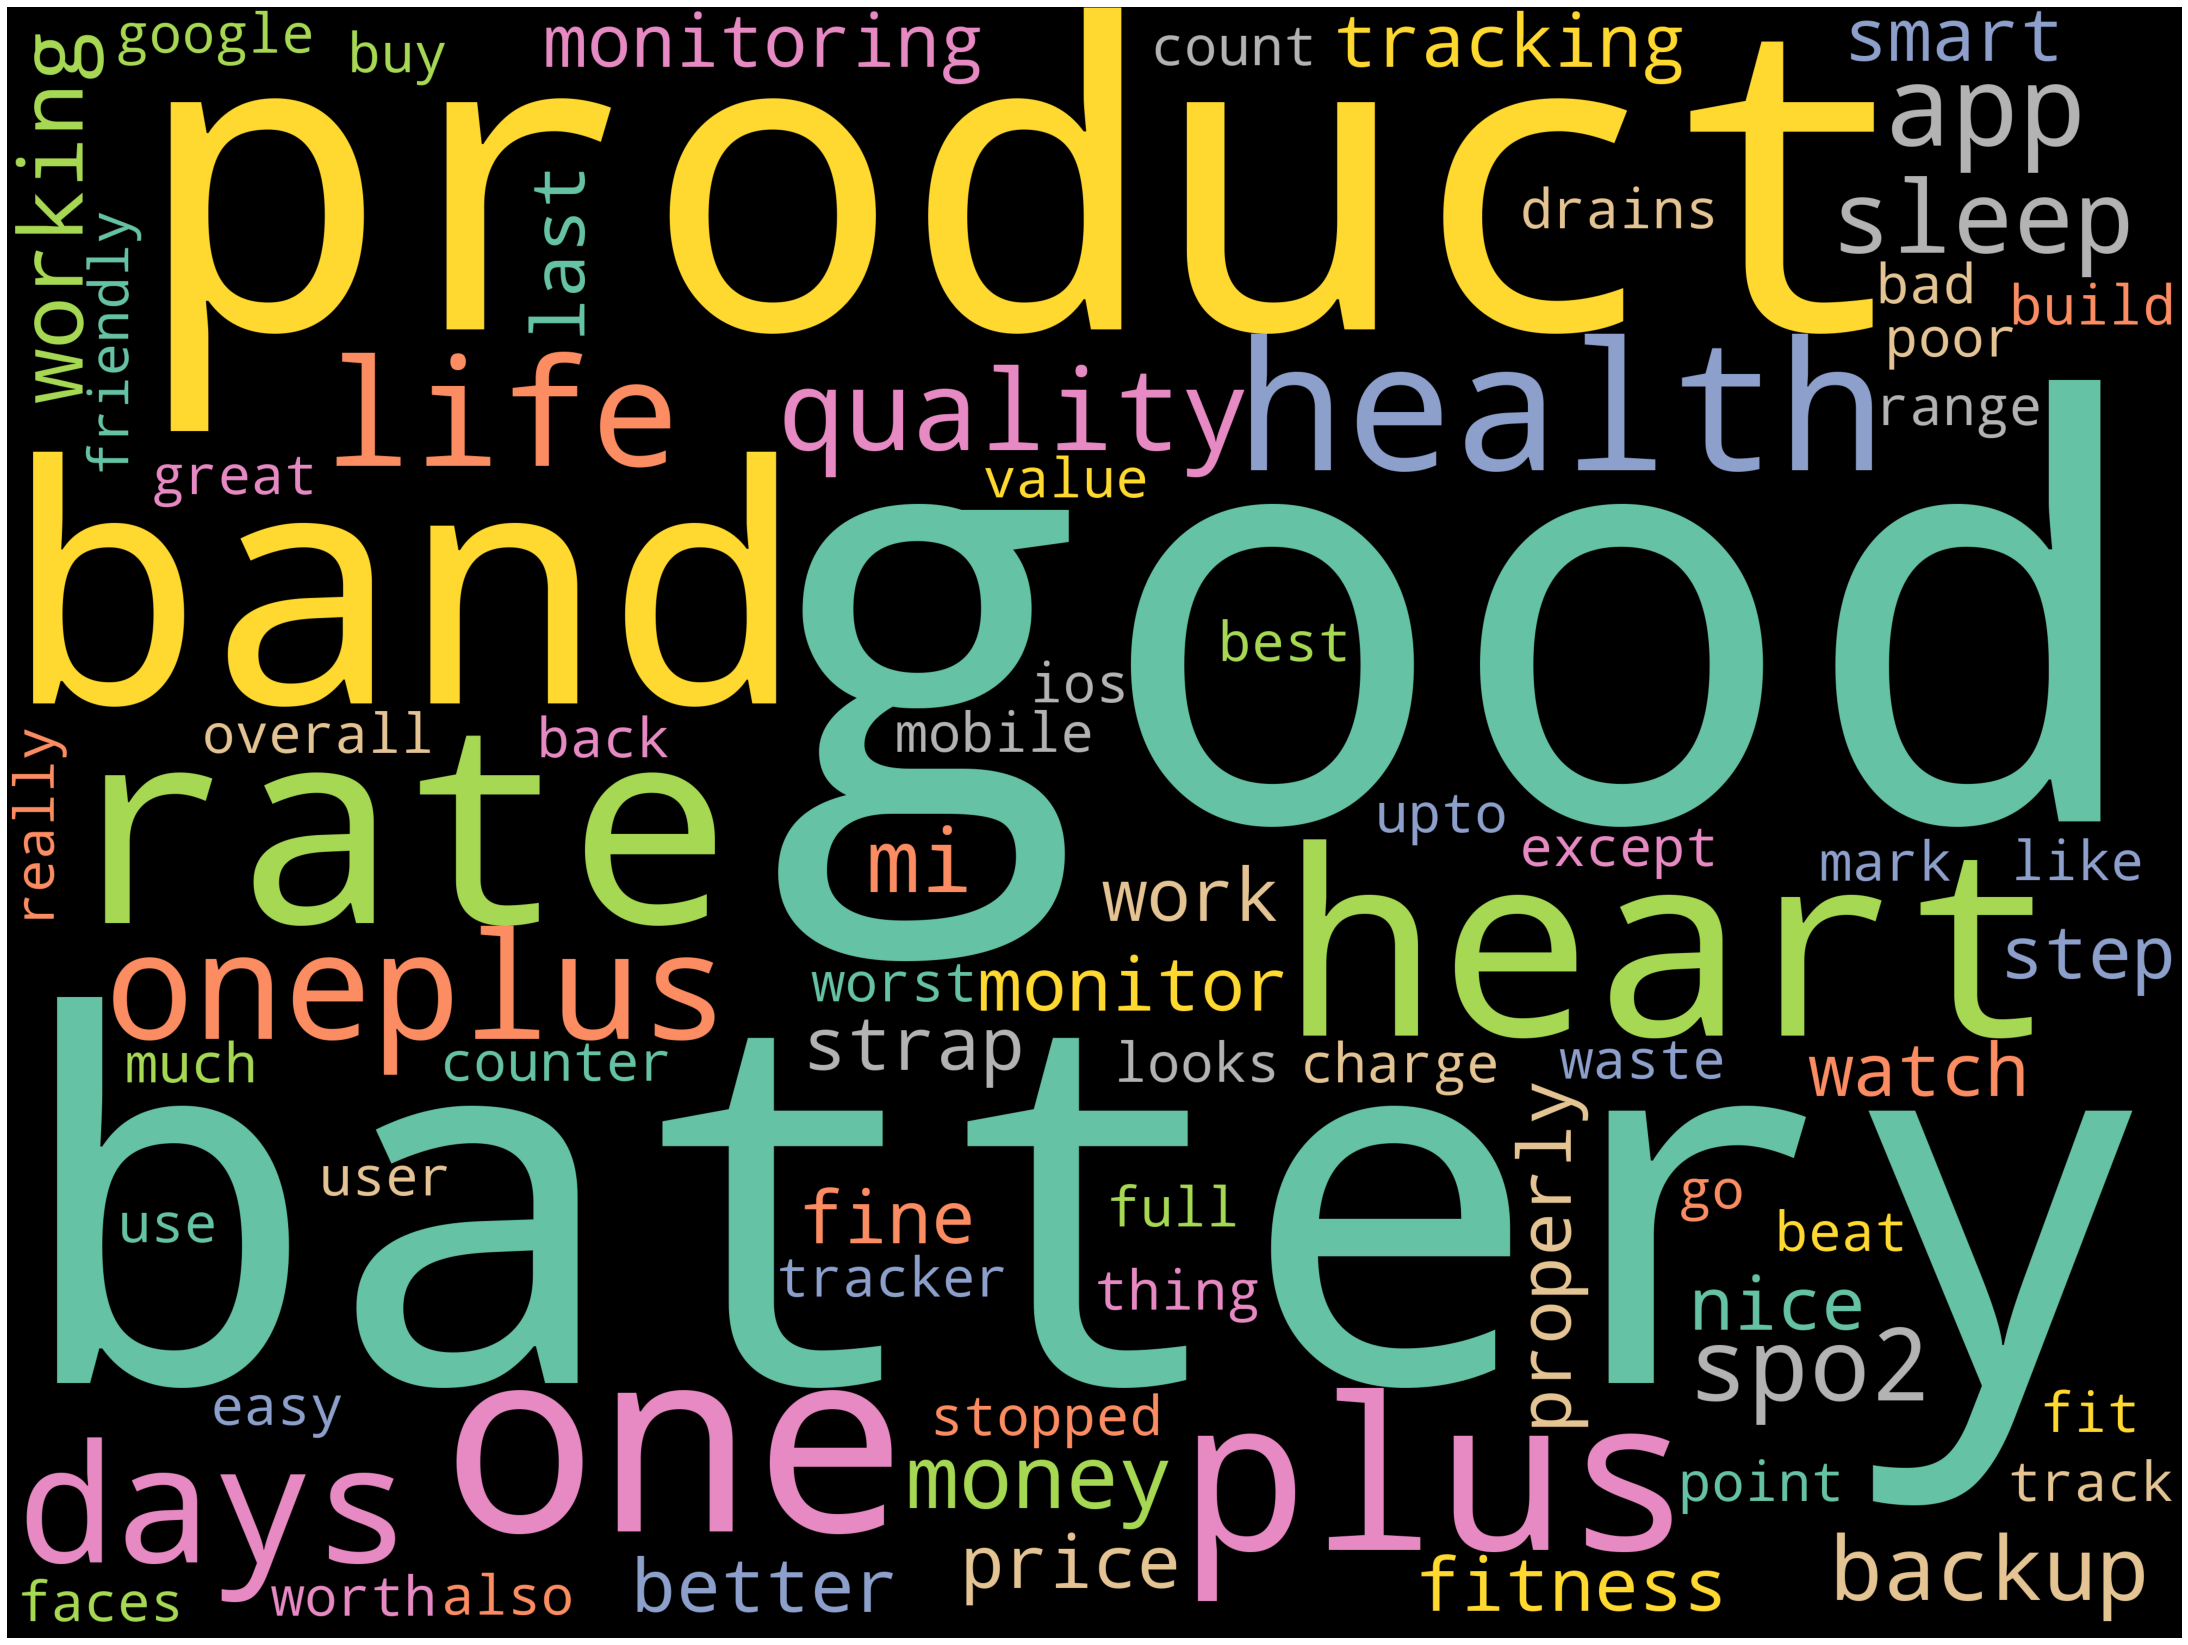

In [48]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names())

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=4000,height=3000,background_color='black',max_words=150,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)

#Named Entity Recognition

Parts of speech (POS)

In [51]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [52]:
for token in doc_block[100:200]:
    print(token,token.pos_)

sensing7 NOUN
battery NOUN
54 NUM
4dayscons NUM
1 NUM
app NOUN
good ADJ
get VERB
option NOUN
app NOUN
get VERB
update NOUN
mi NOUN
band2 VERB
battery NOUN
backup PROPN
8 NUM
9 NUM
day NOUN
247 NUM
heartsense NOUN
disable ADJ
heart NOUN
sense NOUN
247 NUM
expect VERB
14 NUM
daysother NOUN
issueswill NOUN
update VERB
daysthank NOUN
youmanjunath NOUN
m VERB
this DET
activity NOUN
tracker NOUN
nothing PRON
heart NOUN
rate NOUN
monitor NOUN
do AUX
not PART
monitor VERB
heart NOUN
beat VERB
continuously ADV
you PRON
swipe VERB
heart NOUN
beat NOUN
option NOUN
click VERB
start VERB
record NOUN
heart NOUN
beat VERB
even ADV
show VERB
one NUM
reading NOUN
after ADP
refresh PROPN
tap NOUN
start VERB
record NOUN
and CCONJ
show VERB
one NUM
read VERB
againwhat DET
absolute ADJ
disgusting ADJ
processfitbit NOUN
other ADJ
heart NOUN
beat VERB
continuous ADJ
monitoring NOUN
run NOUN
check NOUN
heart NOUN
beat VERB
instantly ADV
continuously ADV
this DET
one NUM
pointlessi NOUN
wish VERB
return NOUN
o

Filtering the nouns and verbs

In [53]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:300])

['record', 'show', 'read', 'processfitbit', 'heart', 'beat', 'monitoring', 'run', 'check', 'heart', 'beat', 'pointlessi', 'wish', 'return', 'option', 'replace', 'option', 'tracker', 'recommend', 'monitor', 'keep', 'display', 'heart', 'beat', 'band', 'iphone', 'app', 'support', 'app', 'store', 'mention', 'product', 'page', 'amazon', 'site', 'mislead', 'product', 'oneplus', 'sell', 'product', 'mislead', 'customer', 'sleep', 'tracker', 'work', 'heart', 'rate', 'tracker', 'fail', 'record', 'heart', 'rate', 'workout', 'moment', 'way', 'set', 'walking', 'stop', 'get', 'continue', 'record', 'activity', 'chair', 'minute', 'integrate', 'fitness', 'app', 'oneplus', 'health', 'disagree', 'stat', 'give', 'waste', 'money', 'avoid', 'band', 'lack', 'require', 'features1', 's', 'way', 'view', 'clock', 'hour', 'format2', 'attach', 'charge', 'feature', 'set', 'alarm', 'update', 'application', 'intuitive5', 'battery', 'backup', 'use', 'product', 'day', 'think', 'band', 'buy', 'price', 'range', 'come', '

Count Nouns and Verbs

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

word  count
0     band    814
1  product    646
2  battery    571
3      day    429
4     work    350
5      use    324
6    watch    279
7  oneplus    273
8      buy    258
9    sleep    257

#Visualization

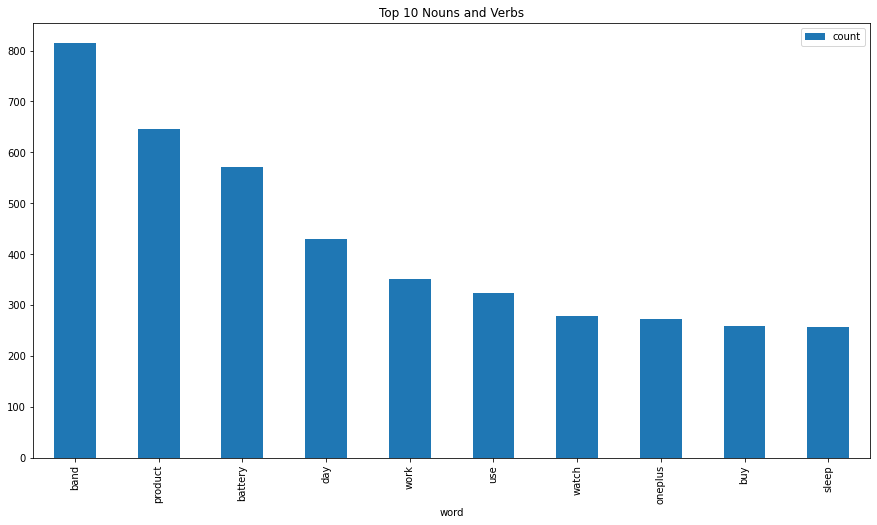

In [56]:
wd_df[0:10].plot.bar(x='word',figsize=(15,8),title='Top 10 Nouns and Verbs')

#Emotion Mining

In [57]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Nothing special about it.',
 'Expected more from oneplus brand.',
 'Both spO2 and heartbeat sensors are inaccurate.Battery isnt 14days if you use it often.',
 "Still looking into it.A lot of pairing issues, not just with me but same issue with other users too.Couldn't expect a lot from a ₹2500 fitness bandGave the watch to my little brother for playing around.",
 'Not good enough to replace my gshock.Edited:Battery last 7 days in normal use.',
 'Product is waste.',
 'Battery backup is worst.',
 'Not worthy Comfortable to wear and looks good 👍🏻 connection to phone is really nice and displays notifications as soon as they comes on phone ✅ Band looks Premium and the sense is good,I am using it from last 3 to 4 days,Pros:1. wrist up to wake is fast2.',
 'Display is super3.',
 'Both Spo2 and hear rate sensing is also good4.',
 'Its water proof5.',
 'Smooth Rubber and skin friendly6.',
 '24/7 heart rate sensing7.',
 'Battery is now 54% for 4days.Cons :1.',
 'App is not good, should get mor

In [58]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0                             Nothing special about it.
1                     Expected more from oneplus brand.
2     Both spO2 and heartbeat sensors are inaccurate...
3     Still looking into it.A lot of pairing issues,...
4     Not good enough to replace my gshock.Edited:Ba...
...                                                 ...
2821                                         I like it.
2822  It's very nice product buy this Amazing produc...
2823  nan ❤ Good Disgusting band Value for money Thi...
2824  I really like one plus band love it Best smart...
2825  Good one Its really beautiful and amazing feat...

[2826 rows x 1 columns]

Emotion Lexicon - Affin

In [59]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [60]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [61]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [63]:
calculate_sentiment(text='falsified')

-3

Calculating sentiment value

In [64]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1        0
2        0
3        1
4        3
        ..
2821     2
2822     7
2823    24
2824     9
2825    11
Name: sentiment_value, Length: 2826, dtype: int64

Word Count

In [65]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        4
1        5
2       14
3       36
4       13
        ..
2821     3
2822    10
2823    40
2824    40
2825    21
Name: word_count, Length: 2826, dtype: int64

In [67]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
954   Sleep tracking is poor and app interface is wo...              -10   
1675  Very poor product Mobile app leaves a lot to b...               -9   
1556  Ony problem what I faced is in his App Most wo...               -9   
1096  Battery capacity is very low24 hrs hi chalti h...               -8   
2254  Charging is draining fast The item was so chea...               -8   
...                                                 ...              ...   
2688  "Oneplus" its true ,it never settles Good disp...               30   
2754  Fine Not working properly Excellent charge bac...               36   
2679  Good product but accuracy missing in tracking ...               36   
2757  But design & looks can be better nan Heart bea...               40   
2800  Very good Best product Battery life is not as ...               51   

      word_count  
954           23  
1675          67  
1556          26  
1096          93  
2254          41  
...          ...  
2688          49  
2754          46  
2679         114  
2757          99  
2800         141  

[2826 rows x 3 columns]

In [66]:
sent_df['sentiment_value'].describe()

count    2826.000000
mean        1.491154
std         4.055730
min       -10.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        51.000000
Name: sentiment_value, dtype: float64

Negative Sentiment Value

In [68]:
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0                             Nothing special about it.                0   
1                     Expected more from oneplus brand.                0   
2     Both spO2 and heartbeat sensors are inaccurate...                0   
5                                     Product is waste.               -1   
6                              Battery backup is worst.               -3   
...                                                 ...              ...   
2811                              Ok Poor didply style.               -2   
2813  nan Like No dislike nan Super nan Superb Nice ...                0   
2815                                               But.                0   
2817                              Met all expectations.                0   
2820  Only last for 4 days Strap broken within 3 mon...                0   

      word_count  
0              4  
1              5  
2             14  
5              3  
6              4  
...          ...  
2811           4  
2813          13  
2815           1  
2817           3  
2820          10  

[1612 rows x 3 columns]

Positive Sentiment Value

In [69]:
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
3     Still looking into it.A lot of pairing issues,...                1   
4     Not good enough to replace my gshock.Edited:Ba...                3   
7     Not worthy Comfortable to wear and looks good ...               11   
14    App is not good, should get more options, App ...                3   
20    This one is pointless.I wish they had a return...                1   
...                                                 ...              ...   
2821                                         I like it.                2   
2822  It's very nice product buy this Amazing produc...                7   
2823  nan ❤ Good Disgusting band Value for money Thi...               24   
2824  I really like one plus band love it Best smart...                9   
2825  Good one Its really beautiful and amazing feat...               11   

      word_count  
3             36  
4             13  
7             49  
14            16  
20            17  
...          ...  
2821           3  
2822          10  
2823          40  
2824          40  
2825          21  

[1214 rows x 3 columns]

Add Index

In [70]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0                             Nothing special about it.                0   
1                     Expected more from oneplus brand.                0   
2     Both spO2 and heartbeat sensors are inaccurate...                0   
3     Still looking into it.A lot of pairing issues,...                1   
4     Not good enough to replace my gshock.Edited:Ba...                3   
...                                                 ...              ...   
2821                                         I like it.                2   
2822  It's very nice product buy this Amazing produc...                7   
2823  nan ❤ Good Disgusting band Value for money Thi...               24   
2824  I really like one plus band love it Best smart...                9   
2825  Good one Its really beautiful and amazing feat...               11   

      word_count  index  
0              4      0  
1              5      1  
2             14      2  
3             36      3  
4             13      4  
...          ...    ...  
2821           3   2821  
2822          10   2822  
2823          40   2823  
2824          40   2824  
2825          21   2825  

[2826 rows x 4 columns]

#Sentiment Value Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


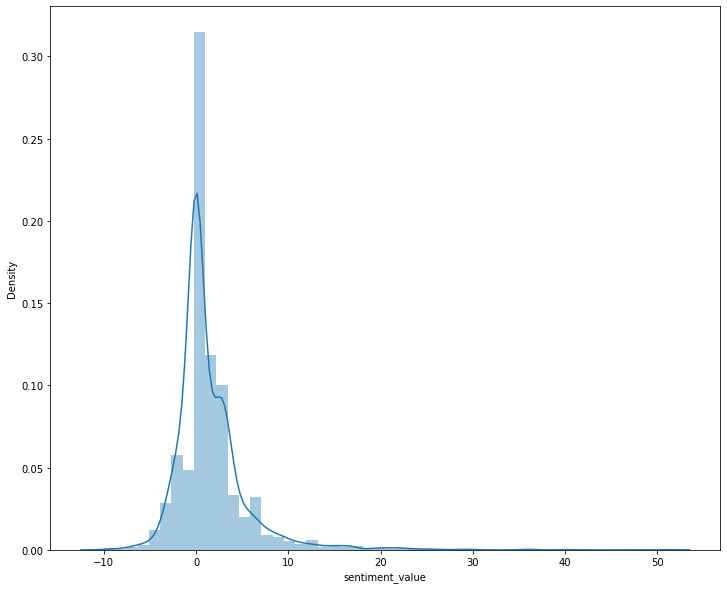

In [71]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.distplot(sent_df['sentiment_value'])

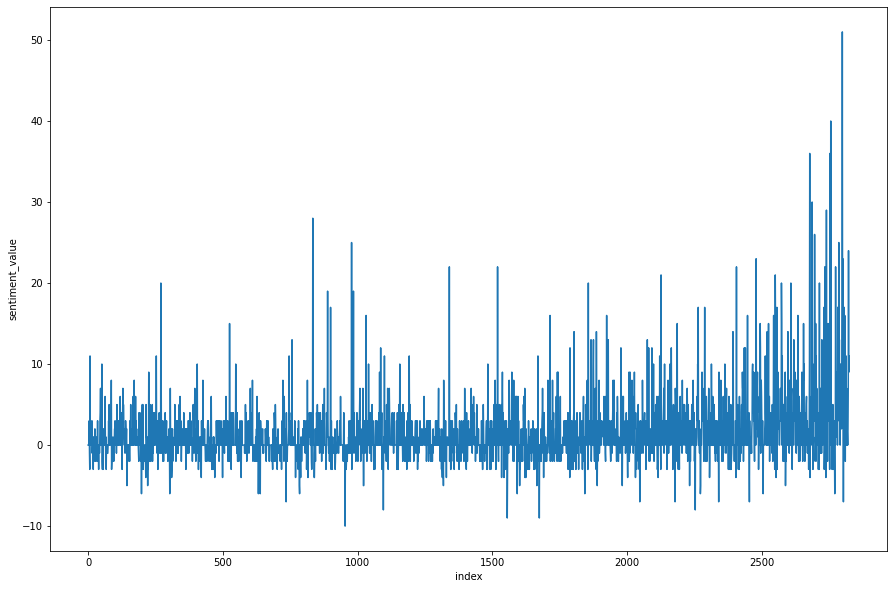

In [72]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)